In [1]:
import json
import os
import numpy as np
import csv
import geopy
from geopy.distance import great_circle
import matplotlib.pylab as plt
import pandas as pd

%matplotlib inline

In [2]:
origin = np.zeros(0,dtype='a32')
destination = np.zeros(0,dtype='a32')
year = np.zeros(0)
month = np.zeros(0)
fare = np.zeros(0)


In [3]:
for root, dirs, files in os.walk("./faredetective"):  
    for filename in files:
        print(filename)
        org = filename[:3]
        dst = filename[4:7]
        with open('./faredetective/'+filename) as json_file:
            data = json.load(json_file)
            for i in range(len(data)):
                origin = np.append(origin,org)
                destination = np.append(destination,dst)
                [mn,yr] = data[i]['year'].split('\n') 
                year = np.append(year,yr)
                month = np.append(month,mn)
                fare = np.append(fare,data[i]['price'])

                
            

ORD-ICN.json
JFK-ARN.json
ICN-SFO.json
ORD-LAX.json
SFO-ICN.json
ORD-OSL.json
LAX-JFK.json
OSL-ORD.json
JFK-FRA.json
LGA-OSL.json
ARN-LHR.json
FRA-JFK.json
LAX-ICN.json
LHR-ARN.json
CDG-KEF.json
KEF-LHR.json
ATL-OSL.json
ICN-LAX.json
AMS-JFK.json
LHR-KEF.json
FRA-LGA.json
LAX-ORD.json
ARN-JFK.json
AMS-KEF.json
KEF-LGA.json
FRA-ORD.json
ORD-FRA.json
HEL-LHR.json
ICN-ORD.json
LGA-FRA.json
JFK-LAX.json
KEF-AMS.json
LGA-KEF.json
ARN-ATL.json
JFK-AMS.json
OSL-ATL.json
ATL-ARN.json
OSL-LGA.json


In [4]:
def match_iata_code(code,reader):
    for row in reader:
        if(row['iata_code'] == code):
            if row['id']!='326459':   #CDG weirdness
                return row['latitude_deg'],row['longitude_deg'],row['name']

In [5]:
unique_codes = np.unique(np.concatenate([origin,destination]))
print(unique_codes)

['AMS' 'ARN' 'ATL' 'CDG' 'FRA' 'HEL' 'ICN' 'JFK' 'KEF' 'LAX' 'LGA' 'LHR'
 'ORD' 'OSL' 'SFO']


In [6]:
code_name_dict = {}
code_lat_dict = {}
code_lon_dict = {}


for code in unique_codes: 
    with open('airports.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        print(code)
        lat,lon,name = match_iata_code(code,reader)
        code_name_dict[code] = name
        code_lat_dict[code] = np.float(lat)
        code_lon_dict[code] = np.float(lon)


        

AMS
ARN
ATL
CDG
FRA
HEL
ICN
JFK
KEF
LAX
LGA
LHR
ORD
OSL
SFO


In [7]:
code_name_dict

{'AMS': 'Amsterdam Airport Schiphol',
 'ARN': 'Stockholm-Arlanda Airport',
 'ATL': 'Hartsfield Jackson Atlanta International Airport',
 'CDG': 'Charles de Gaulle International Airport',
 'FRA': 'Frankfurt am Main Airport',
 'HEL': 'Helsinki Vantaa Airport',
 'ICN': 'Incheon International Airport',
 'JFK': 'John F Kennedy International Airport',
 'KEF': 'Keflavik International Airport',
 'LAX': 'Los Angeles International Airport',
 'LGA': 'La Guardia Airport',
 'LHR': 'London Heathrow Airport',
 'ORD': "Chicago O'Hare International Airport",
 'OSL': 'Oslo Gardermoen Airport',
 'SFO': 'San Francisco International Airport'}

In [8]:
code_lat_dict

{'AMS': 52.3086013794,
 'ARN': 59.651901245117,
 'ATL': 33.63669967651367,
 'CDG': 49.0127983093,
 'FRA': 50.033333,
 'HEL': 60.317199707031,
 'ICN': 37.46910095214844,
 'JFK': 40.63980103,
 'KEF': 63.985000610352,
 'LAX': 33.94250107,
 'LGA': 40.77719879,
 'LHR': 51.4706,
 'ORD': 41.97859955,
 'OSL': 60.193901062012,
 'SFO': 37.61899948120117}

In [9]:
code_lon_dict

{'AMS': 4.763889789579999,
 'ARN': 17.918600082397,
 'ATL': -84.4281005859375,
 'CDG': 2.54999995232,
 'FRA': 8.570556,
 'HEL': 24.963300704956,
 'ICN': 126.45099639892578,
 'JFK': -73.77890015,
 'KEF': -22.605600357056,
 'LAX': -118.4079971,
 'LGA': -73.87259674,
 'LHR': -0.461941,
 'ORD': -87.90480042,
 'OSL': 11.100399971008,
 'SFO': -122.375}

In [10]:
N = len(origin)
print(N)
print(fare.astype(float))

683
[ 1113.84    1057.72    1002.29     811.66     849.86     849.69     726.03
   751.46     775.45     739.12    1028.64     444.39     846.81    1328.35
   832.75     912.557    907.49     889.714    906.05     812.06     537.26
   564.039    429.32     468.81     384.235    488.22     462.52     461.73
   551.188    958.331    527.189   1018.63     462.95     532.98     474.97
   925.5      292.87     224.94     225.54     226.98     225.4      239.94
   236.03     249.69     208.95     218.39     108.52     145.16     158.431
   188.244    107.8      124.18     167.979    166.14     166.14     112.96
   207.05      95.62     134.4      235.755    225.4      195.991    162.19
   231.04     322.4      454.       279.599    195.923    196.375    160.4
   200.4      176.863    321.348    179.309     95.8188   201.6      231.384
   236.4      308.128    147.47     216.4      180.59     287.73     226.37
   825.45     792.91     624.39     981.69     538.86     556.97     561.67
   946.

In [11]:
gc_list = []
for i in range(N):
    c1 = (code_lat_dict[origin[i]],code_lon_dict[origin[i]])
    c2 = (code_lat_dict[destination[i]],code_lon_dict[destination[i]])
    gcd = great_circle(c1,c2).miles
    gc_list.append(gcd)
    
gc_distance = np.array(gc_list)
print(gc_distance)


[ 6536.25663284  6536.25663284  6536.25663284  6536.25663284  6536.25663284
  6536.25663284  6536.25663284  6536.25663284  6536.25663284  6536.25663284
  6536.25663284  3909.65930088  3909.65930088  3909.65930088  3909.65930088
  3909.65930088  3909.65930088  3909.65930088  3909.65930088  3909.65930088
  3909.65930088  3909.65930088  3909.65930088  3909.65930088  3909.65930088
  3909.65930088  3909.65930088  3909.65930088  3909.65930088  3909.65930088
  3909.65930088  3909.65930088  3909.65930088  3909.65930088  3909.65930088
  5645.33030508  1741.15659819  1741.15659819  1741.15659819  1741.15659819
  1741.15659819  1741.15659819  1741.15659819  1741.15659819  1741.15659819
  1741.15659819  1741.15659819  1741.15659819  1741.15659819  1741.15659819
  1741.15659819  1741.15659819  1741.15659819  1741.15659819  1741.15659819
  1741.15659819  1741.15659819  1741.15659819  1741.15659819  1741.15659819
  1741.15659819  1741.15659819  1741.15659819  1741.15659819  1741.15659819
  1741.15659

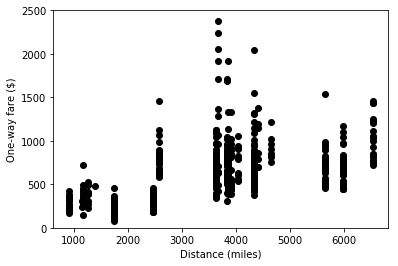

In [12]:
plt.figure()
plt.clf()
plt.plot(gc_distance,fare.astype(float),'ok')
plt.ylim([0,2500])
plt.xlabel('Distance (miles)')
plt.ylabel('One-way fare ($)')
plt.savefig('airfares.pdf')

In [ ]:
gc_list = []
origin_lat = 
for i in range(N):
    c1 = (code_lat_dict[origin[i]],code_lon_dict[origin[i]])
    c2 = (code_lat_dict[destination[i]],code_lon_dict[destination[i]])
    gcd = great_circle(c1,c2).miles
    gc_list.append(gcd)
    
gc_distance = np.array(gc_list)
print(gc_distance)    

In [40]:
def monthToNum(month):
    monthNum = {
                    'Jan' : 1,
                    'Feb' : 2,
                    'Mar' : 3,
                    'Apr' : 4,
                    'May' : 5,
                    'Jun' : 6,
                    'Jul' : 7,
                    'Aug' : 8,
                    'Sep' : 9, 
                    'Oct' : 10,
                    'Nov' : 11,
                    'Dec' : 12
            }
    return monthNum[month]



In [61]:
month_num = ([monthToNum(month[i]) for i in range(N)])
date_code = ([np.float(year[i]) + np.float(month_num[i])/12.0 for i in range(N)])

In [70]:
df = pd.DataFrame({'Origin lat' : [code_lat_dict[origin[i]] for i in range(N)],        #0
                   'Origin lon' : [code_lon_dict[origin[i]] for i in range(N)],
                   'Destination lat' : [code_lat_dict[destination[i]] for i in range(N)],
                   'Destination lon' : [code_lon_dict[destination[i]] for i in range(N)],
                   'distance' : [gc_list[i] for i in range(N)],
                   'year' : [year[i] for i in range(N)],
                   'month' : [month_num[i] for i in range(N)],
                    'date' : [date_code[i] for i in range(N)],
                   'airfare' : [fare[i].astype(float) for i in range(N)]})

,Origin lat,Origin lon,Destination lat,Destination lon,distance,year,month,date,airfare
0,41.978600,-87.904800,37.469101,126.450996,6536.256633,2017,7,2017.583333,1113.840
1,41.978600,-87.904800,37.469101,126.450996,6536.256633,2017,8,2017.666667,1057.720
2,41.978600,-87.904800,37.469101,126.450996,6536.256633,2017,9,2017.750000,1002.290
3,41.978600,-87.904800,37.469101,126.450996,6536.256633,2017,9,2017.750000,811.660
4,41.978600,-87.904800,37.469101,126.450996,6536.256633,2017,10,2017.833333,849.860
5,41.978600,-87.904800,37.469101,126.450996,6536.256633,2017,10,2017.833333,849.690
6,41.978600,-87.904800,37.469101,126.450996,6536.256633,2017,11,2017.916667,726.030
7,41.978600,-87.904800,37.469101,126.450996,6536.256633,2017,12,2018.000000,751.460
8,41.978600,-87.904800,37.469101,126.450996,6536.256633,2018,2,2018.166667,775.450
9,41.978600,-87.904800,37.469101,126.450996,6536.256633,2018,4,2018.333333,739.120


In [81]:
from sklearn.preprocessing import StandardScaler  

X_train  = df.drop(["airfare"], axis=1)
Y_train = df["airfare"]


#scaler = StandardScaler()  
#scaler.fit(X_train)  
#X_train = scaler.transform(X_train)


In [73]:
#class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_train)



/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


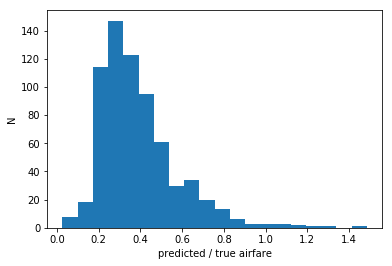

In [78]:
plt.figure()
plt.clf()
plt.hist(Y_pred/Y_train,bins=20)
plt.xlabel('predicted / true airfare')
plt.ylabel('N')
plt.savefig('neural.pdf')

,year,month
0,2017,7
1,2017,8
2,2017,9
3,2017,9
4,2017,10
5,2017,10
6,2017,11
7,2017,12
8,2018,2
9,2018,4


In [142]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categorical_features=[0,1,2,3])
X  = df.drop(["airfare"], axis=1)
Y = df["airfare"]

X['Origin lon'] = X['Origin lon']+180.0
X['Destination lon'] = X['Destination lon']+180.0
X['Origin lat'] = X['Origin lat']+90.0
X['Destination lat'] = X['Destination lat']+90.0


enc.fit_transform(X)


onehot_X = pd.concat([X['Origin lon'],X['Origin lat'],
                      X['Destination lon'],X['Destination lat'],
                     X['month']],axis=1)

nothot_X = pd.concat([X['distance'],X['year'],X['date']],axis=1)

X_onehot = enc.fit_transform(onehot_X)
X_onehot_pd = pd.DataFrame(X_onehot.todense())

#print(X_train.iloc[1])
#print(X_train_new.shape)
#print(X_train_new)
#temp = pd.concat([X_train['year'],X_train['month']],axis=1)
scaler = StandardScaler()  
scaler.fit(nothot_X)  
X_nothot = scaler.transform(nothot_X)
X_nothot_pd = pd.DataFrame(X_nothot)

X_new = pd.concat([X_onehot_pd,X_nothot_pd],axis=1)




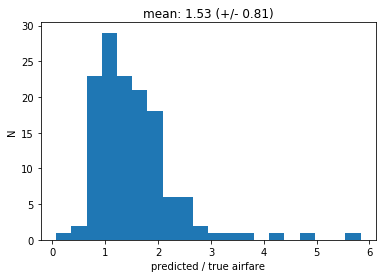

In [173]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)



#class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08
reg = MLPRegressor()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
plt.figure()
plt.clf()
plt.hist(Y_pred/Y_test,bins=20)
plt.xlabel('predicted / true airfare')
plt.ylabel('N')
ratio = Y_pred/Y_test
plt.title("mean: %0.2f (+/- %0.2f)" % (ratio.mean(), ratio.std()))
plt.savefig('neural4.pdf')



In [161]:
from sklearn.model_selection import cross_val_score
scores = 
scores = cross_val_score(reg,X,Y,cv=5,scoring='neg_mean_squared_error')
print("accuracy: %0.2f (+/- %0.2f)" % ((-scores.mean())**0.5, (scores.std()*2)**0.5))

accuracy: 702.01 (+/- 1209.98)


In [163]:
scores = cross_val_score(reg,X_new,Y,cv=5,scoring='neg_mean_squared_error')
print("accuracy: %0.2f (+/- %0.2f)" % ((-scores.mean())**0.5, (scores.std()*2)**0.5))

/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

accuracy: 712.90 (+/- 1260.41)


/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
